In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
ratings=pd.read_csv("ratings_cleaned.csv")
books = pd.read_csv("books_cleaned.csv", encoding='latin-1')
users = pd.read_csv("users_cleaned.csv", encoding='latin-1')

In [7]:
print("Books Columns:\n", books.dtypes)
print("Users Columns:\n", users.dtypes)
print("Ratings Columns:\n", ratings.dtypes)

Books Columns:
 ISBN                    object
Book-Title              object
Book-Author             object
Year-Of-Publication    float64
Publisher               object
Image-URL-S             object
Image-URL-M             object
Image-URL-L             object
dtype: object
Users Columns:
 User-ID       int64
Location     object
Age         float64
dtype: object
Ratings Columns:
 User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object


In [8]:
print("Books Missing:\n", books.isnull().sum())
print("Users Missing:\n", users.isnull().sum())
print("Ratings Missing:\n", ratings.isnull().sum())

Books Missing:
 ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
Users Missing:
 User-ID     0
Location    0
Age         0
dtype: int64
Ratings Missing:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [9]:
print(ratings.describe())
print(users.describe())
print(books.describe())

            User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00
75%    2.110280e+05  7.000000e+00
max    2.788540e+05  1.000000e+01
            User-ID            Age
count  278858.00000  278858.000000
mean   139429.50000      31.482930
std     80499.51502       4.248641
min         1.00000      20.000000
25%     69715.25000      32.000000
50%    139429.50000      32.000000
75%    209143.75000      32.000000
max    278858.00000      44.000000
       Year-Of-Publication
count        271360.000000
mean           1994.256022
std               6.980367
min            1973.000000
25%            1990.000000
50%            1996.000000
75%            2000.000000
max            2012.000000


In [3]:
ratings

User-ID         ISBN  Book-Rating
0         276725   034545104X            0
1         276726   0155061224            5
2         276727   0446520802            0
3         276729   052165615X            3
4         276729   0521795028            6
...          ...          ...          ...
1149775   276704   1563526298            9
1149776   276706   0679447156            0
1149777   276709   0515107662           10
1149778   276721   0590442449           10
1149779   276723  05162443314            8

[1149780 rows x 3 columns]

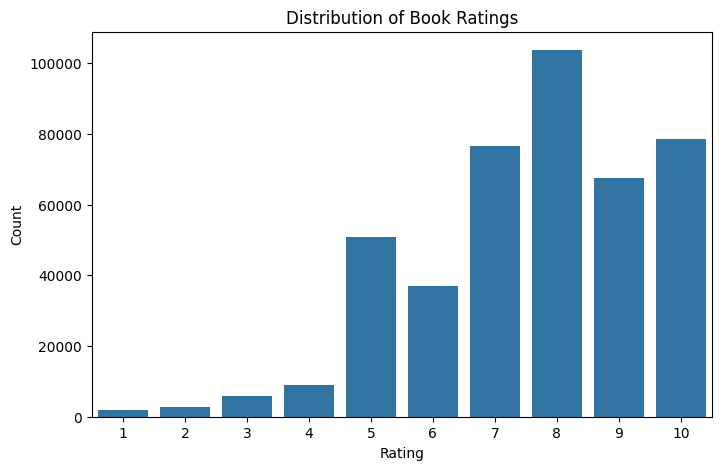

In [10]:
explicit_ratings = ratings[ratings['Book-Rating'] > 0]
plt.figure(figsize=(8, 5))
sns.countplot(x='Book-Rating', data=explicit_ratings)
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [11]:
user_avg = explicit_ratings.groupby('User-ID')['Book-Rating'].mean()
print("User Avg Rating:\n", user_avg.head())

User Avg Rating:
 User-ID
8      5.571429
9      6.000000
10     6.000000
12    10.000000
14     5.333333
Name: Book-Rating, dtype: float64


In [12]:
book_avg = explicit_ratings.groupby('ISBN')['Book-Rating'].mean()
print("Book Avg Rating:\n", book_avg.head())

Book Avg Rating:
 ISBN
 0330299891      6.0
 0375404120      3.0
 9022906116      7.0
#6612432         5.0
'9607092910'    10.0
Name: Book-Rating, dtype: float64


In [13]:
for N in [10, 20, 50]:
    active_users = explicit_ratings['User-ID'].value_counts()
    print(f"Users who rated more than {N} books: {(active_users > N).sum()}")

Users who rated more than 10 books: 6655
Users who rated more than 20 books: 3521
Users who rated more than 50 books: 1295


In [14]:
book_counts = explicit_ratings.groupby('ISBN')['Book-Rating'].count()
book_stats = book_avg[book_counts > 10].sort_values()

In [15]:
print("Lowest rated books:\n", book_stats.head())
print("Highest rated books:\n", book_stats.tail())

Lowest rated books:
 ISBN
0971880107    4.390706
0679463321    5.066667
0349111863    5.076923
0142000981    5.133333
0871138190    5.166667
Name: Book-Rating, dtype: float64
Highest rated books:
 ISBN
0060256656     9.750000
0394800389     9.785714
0439425220     9.869565
0836213319     9.923077
1888054557    10.000000
Name: Book-Rating, dtype: float64


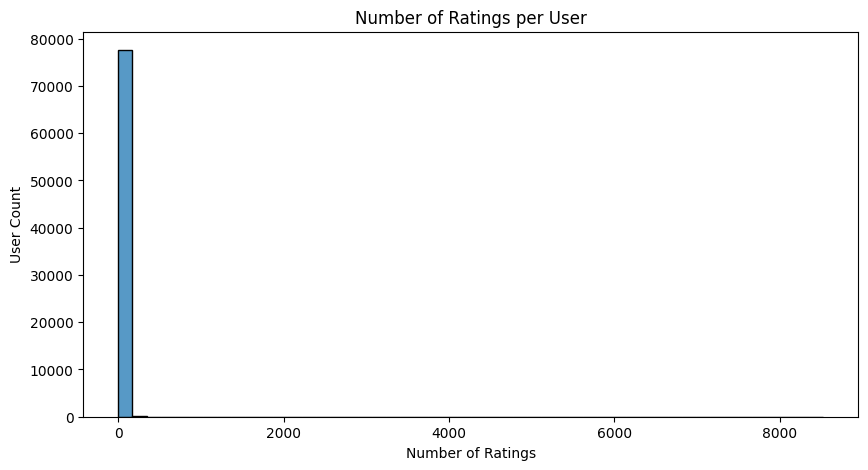

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(explicit_ratings['User-ID'].value_counts(), bins=50, kde=False)
plt.title("Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("User Count")
plt.show()

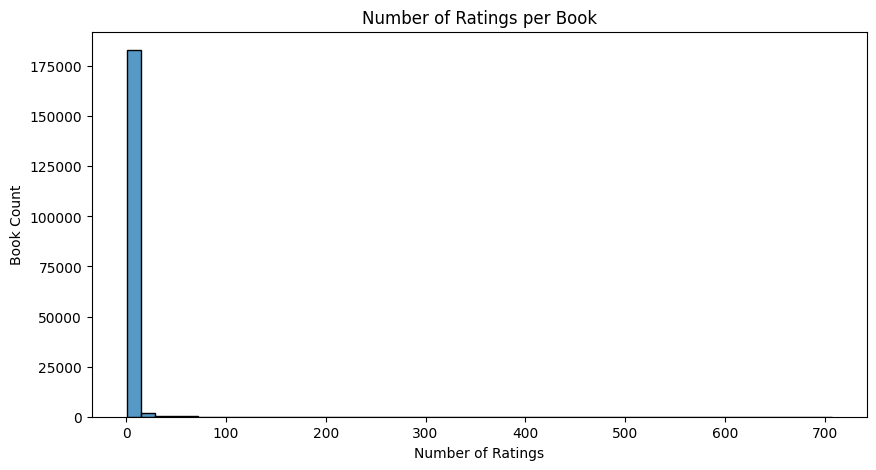

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(explicit_ratings['ISBN'].value_counts(), bins=50, kde=False)
plt.title("Number of Ratings per Book")
plt.xlabel("Number of Ratings")
plt.ylabel("Book Count")
plt.show()

In [18]:
top_users = explicit_ratings['User-ID'].value_counts().head(30).index
top_books = explicit_ratings['ISBN'].value_counts().head(30).index
sample = explicit_ratings[explicit_ratings['User-ID'].isin(top_users) &
                          explicit_ratings['ISBN'].isin(top_books)]

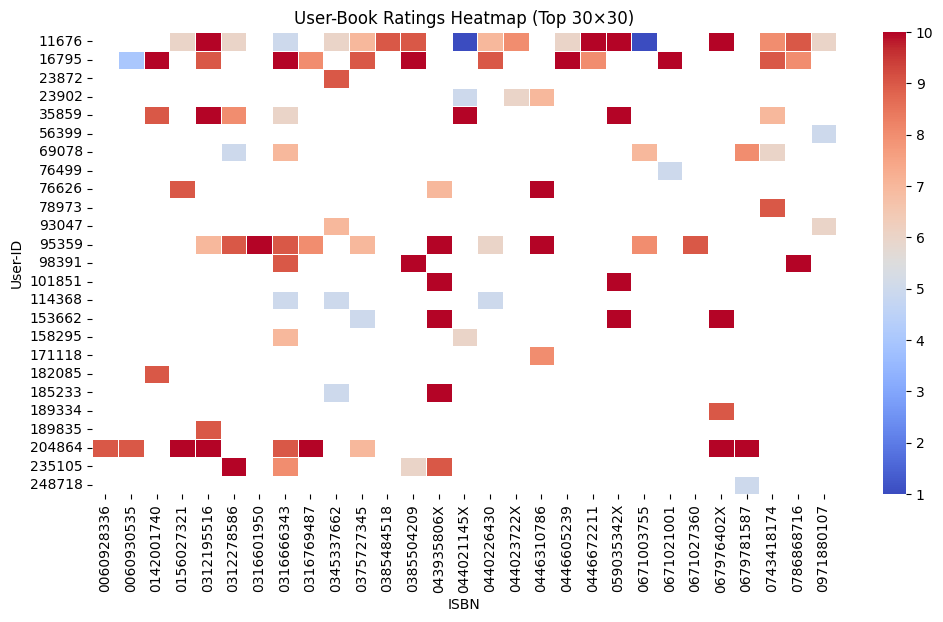

In [19]:
pivot = sample.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='coolwarm', linewidths=0.5)
plt.title('User-Book Ratings Heatmap (Top 30×30)')
plt.show()

In [20]:
top_users = explicit_ratings['User-ID'].value_counts().head(10)
print("Top 10 Active Users:\n", top_users)

Top 10 Active Users:
 User-ID
11676     8524
98391     5802
153662    1969
189835    1906
23902     1395
76499     1036
171118    1035
235105    1023
16795      968
248718     948
Name: count, dtype: int64


In [21]:
top_books = explicit_ratings['ISBN'].value_counts().head(10)
print("Top 10 Most Rated Books:\n", top_books)

Top 10 Most Rated Books:
 ISBN
0316666343    707
0971880107    581
0385504209    487
0312195516    383
0679781587    333
0060928336    320
059035342X    313
0142001740    307
0446672211    295
044023722X    281
Name: count, dtype: int64


In [22]:
book_counts = explicit_ratings.groupby('ISBN')['Book-Rating'].count()
book_means = explicit_ratings.groupby('ISBN')['Book-Rating'].mean()
popular_books = book_means[book_counts >= 50].sort_values(ascending=False).head(10)
print("Top Rated Books (≥ 50 ratings):\n", popular_books)

Top Rated Books (≥ 50 ratings):
 ISBN
0345339738    9.402597
0439139597    9.262774
043936213X    9.207547
0345339711    9.120482
0439136369    9.082707
0064400557    9.073529
0439136350    9.035461
043935806X    9.033981
0590353403    8.983193
0156528207    8.980392
Name: Book-Rating, dtype: float64


In [23]:
n_users = ratings['User-ID'].nunique()
n_books = ratings['ISBN'].nunique()
n_ratings = ratings[ratings['Book-Rating'] > 0].shape[0]

In [24]:
total_possible = n_users * n_books
sparsity = 1 - (n_ratings / total_possible)

In [25]:
print(f"Total Users: {n_users}")
print(f"Total Books: {n_books}")
print(f"Number of Ratings: {n_ratings}")
print(f"Sparsity of User-Book Matrix: {sparsity:.4f}")

Total Users: 105283
Total Books: 340556
Number of Ratings: 433671
Sparsity of User-Book Matrix: 1.0000
